<a href="https://colab.research.google.com/github/Tkag0001/Practice-ML-with-Digit-recognize-problem/blob/main/code/Train_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Problem: Recognizing handwritten digits
Data resources: https://www.kaggle.com/c/digit-recognizer

#Connect to drive:

In [34]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#Import packages:

In [2]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

#Loading the dataset:


unzip data

In [ ]:
!unzip '/content/drive/MyDrive/Tài liệu học kì 1 năm 3/Open_source/Project/data/digit-recognizer.zip' -d '/content/drive/MyDrive/Tài liệu học kì 1 năm 3/Open_source/Project/data'

Archive:  /content/drive/MyDrive/Tài liệu học kì 1 năm 3/Open_source/Project/data/digit-recognizer.zip
  inflating: /content/drive/MyDrive/Tài liệu học kì 1 năm 3/Open_source/Project/data/sample_submission.csv  
  inflating: /content/drive/MyDrive/Tài liệu học kì 1 năm 3/Open_source/Project/data/test.csv  
  inflating: /content/drive/MyDrive/Tài liệu học kì 1 năm 3/Open_source/Project/data/train.csv  


## Note: pls change url to your data folder

In [35]:
train = pd.read_csv('/content/drive/MyDrive/Tài liệu học kì 1 năm 3/Open_source/Project/data/train.csv')
test = pd.read_csv('/content/drive/MyDrive/Tài liệu học kì 1 năm 3/Open_source/Project/data/test.csv')

In [ ]:
print(f"train size: {train.shape}")
print(f"test size: {test.shape}")

train size: (42000, 785)
test size: (28000, 784)


#Visualize data

In [4]:
train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
test.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [36]:
y_train = train['label']
X_train = train.drop(labels=['label'],axis = 1)

1    4684
7    4401
3    4351
9    4188
2    4177
6    4137
0    4132
4    4072
8    4063
5    3795
Name: label, dtype: int64


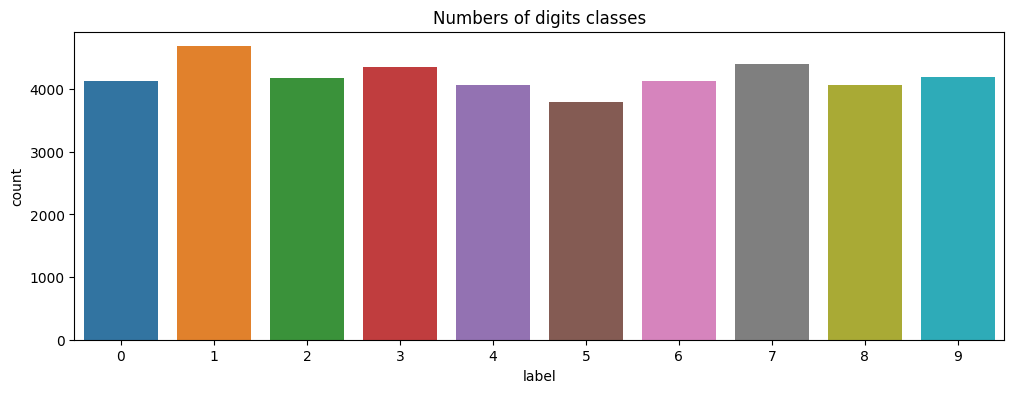

In [37]:
plt.figure(figsize=(12,4))
g = sns.countplot(x=y_train)
plt.title("Numbers of digits classes")
print(y_train.value_counts())
plt.show()

In [9]:
print(type(y_train[0]))

<class 'numpy.int64'>


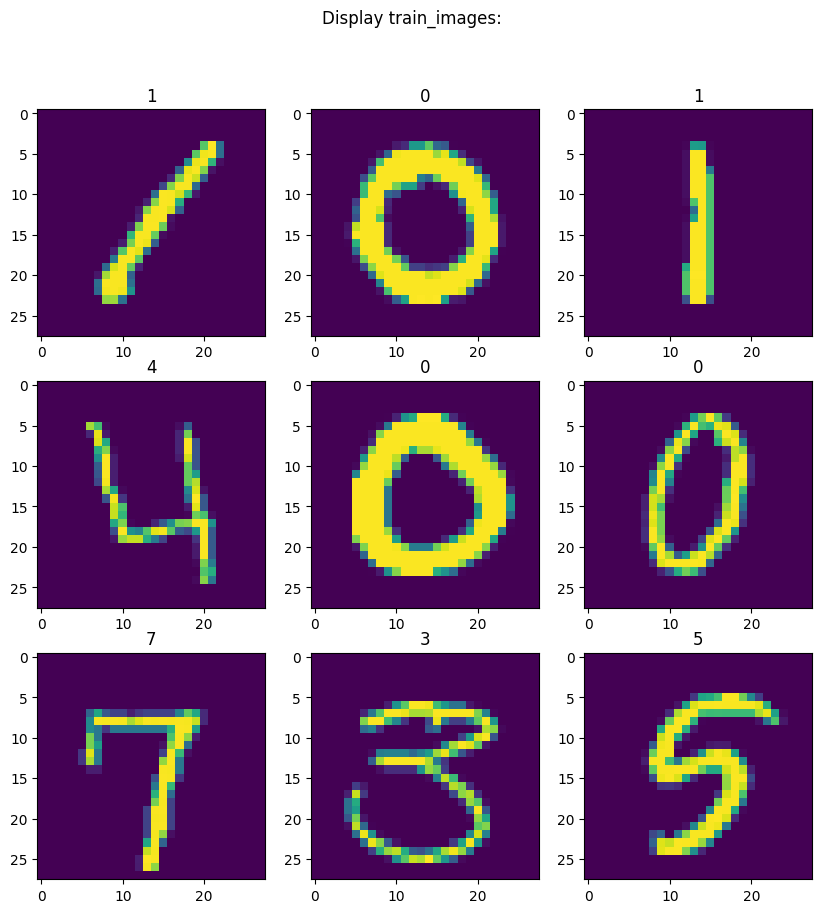

In [14]:
# Display images

fig, axs = plt.subplots(nrows= 3, ncols = 3, figsize = (10,10))
ax = axs.ravel()
for i in range(9):
  data_image = X_train.iloc[i]
  img = data_image.values
  # img = img.as_matrix()
  img = img.reshape((28,28))
  ax[i].imshow(img,aspect="auto")
  # title = y_train[i].astype(str)
  ax[i].set_title(y_train[i])
fig.suptitle("Display train_images:")
plt.show()

#Normalize, Reshape and Label Endcoding:
Why do we have to do them?

##Normalize data:


1.   We normalize data with grayscale to reduce the effect of illumination's differences.
2.   CNN model can work faster when we perform nomalization



In [38]:
X_train = X_train/255.0
test = test/255.0

print(f"X_train shape: {X_train.shape}")
X_train.info()
print(f"\nTest shape: {test.shape}")
test.info()

X_train shape: (42000, 784)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42000 entries, 0 to 41999
Columns: 784 entries, pixel0 to pixel783
dtypes: float64(784)
memory usage: 251.2 MB

Test shape: (28000, 784)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28000 entries, 0 to 27999
Columns: 784 entries, pixel0 to pixel783
dtypes: float64(784)
memory usage: 167.5 MB


##Reshape data:


1.   Train and test images are currently 2D matrix(28 x 28), we reshape all to 3D matrix(28 x 28 x 1)
2.   Keras needs an extra dimension in the end which correspond to channels. Our images are gray scaled so it use only one channel.



In [39]:
X_train = X_train.values.reshape(-1,28,28,1)
test = test.values.reshape(-1,28,28,1)
print(f"X_train: {X_train.shape}")
print(f"y_train: {y_train.shape}")

X_train: (42000, 28, 28, 1)
y_train: (42000,)


##Label Encoding:
Encode labels to one hot vectors

In [42]:
import tensorflow

In [45]:
from tensorflow.keras import utils
y_train = utils.to_categorical(y_train, num_classes = 10)

In [47]:
print(y_train)

[[0. 1. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 1.]]


#Train Test split


In [49]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train,test_size = 0.1,random_state =2)

In [50]:
print(f"X_train.shape: {X_train.shape}")
print(f"y_train.shape: {y_train.shape}")
print(f"\nX_val.shape: {X_val.shape}")
print(f"y_val.shape: {y_val.shape}")


X_train.shape: (37800, 28, 28, 1)
y_train.shape: (37800, 10)

X_val.shape: (4200, 28, 28, 1)
y_val.shape: (4200, 10)
